In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_excel('Test MS Excel_MA.xlsx', sheet_name='task1', header=1, usecols=6)\
    .rename(
        columns={
            'Дата': 'date_created', 
            'Сайт': 'site', 
            'Страна': 'country', 
            'Уникальных посетителей': 'uniq_users', 
            'Регистраций': 'regs', 
            'Конверсия': 'conv',
            'ID Промокод': 'code_id'
        }
    )

In [37]:
data.head()

,date_created,site,country,uniq_users,regs,conv,code_id
0,2019-08-01,SITE_2,Albania (AL),76,5,NaN,22
1,2019-08-01,SITE_1,Algeria (DZ),213,66,NaN,40
2,2019-08-01,SITE_3,Angola (AO),45,10,NaN,15
3,2019-08-01,SITE_2,Argentina (AR),2191,103,NaN,22
4,2019-08-01,SITE_3,Austria (AT),2467,512,NaN,40


In [15]:
table_2 = pd.read_clipboard()

In [17]:
table_2.rename(
    columns={'ID Промокод': 'code_id', 'Название промокода': 'code_name'},
    inplace=True
)

In [18]:
table_3 = pd.DataFrame(
    {'conv': [0.3, 0.6, 1], 'status': ['C', 'B', 'A']}
)

In [19]:
table_3

,conv,status
0,0.3,C
1,0.6,B
2,1.0,A


In [20]:
data.head()

,date_created,site,country,uniq_users,regs,conv,code_id,code_name,status
0,2019-08-01,SITE_2,Albania (AL),76,5,NaN,22,NaN,NaN
1,2019-08-01,SITE_1,Algeria (DZ),213,66,NaN,40,NaN,NaN
2,2019-08-01,SITE_3,Angola (AO),45,10,NaN,15,NaN,NaN
3,2019-08-01,SITE_2,Argentina (AR),2191,103,NaN,22,NaN,NaN
4,2019-08-01,SITE_3,Austria (AT),2467,512,NaN,40,NaN,NaN


In [21]:
data.shape

(8353, 9)

In [38]:
data.drop_duplicates().shape

(8353, 7)

In [39]:
data['conv'] = data['regs']/data['uniq_users']

In [40]:
data.head()

,date_created,site,country,uniq_users,regs,conv,code_id
0,2019-08-01,SITE_2,Albania (AL),76,5,0.065789,22
1,2019-08-01,SITE_1,Algeria (DZ),213,66,0.309859,40
2,2019-08-01,SITE_3,Angola (AO),45,10,0.222222,15
3,2019-08-01,SITE_2,Argentina (AR),2191,103,0.047010,22
4,2019-08-01,SITE_3,Austria (AT),2467,512,0.207540,40


In [41]:
data['status'] = pd.Series()
data.loc[data['conv'] < 0.3, 'status'] = 'C'
data.loc[(data['conv'] <= 0.6) & (data['conv'] >= 0.3), 'status'] = 'B'
data['status'] = data['status'].fillna('A')

In [46]:
data.head()

,date_created,site,country,uniq_users,regs,conv,code_id,status,code_name
0,2019-08-01,SITE_2,Albania (AL),76,5,0.065789,22,C,holiday
1,2019-08-01,SITE_1,Algeria (DZ),213,66,0.309859,40,B,party
2,2019-08-01,SITE_3,Angola (AO),45,10,0.222222,15,C,weekend
3,2019-08-01,SITE_2,Argentina (AR),2191,103,0.047010,22,C,holiday
4,2019-08-01,SITE_3,Austria (AT),2467,512,0.207540,40,C,party


In [44]:
data = pd.merge(data, table_2, how='left', on='code_id')

In [45]:
data[data['code_name'].isna()]

,date_created,site,country,uniq_users,regs,conv,code_id,status,code_name


In [71]:
by_site = data.groupby(['site', 'code_name'], as_index=False)\
    .agg({'regs': 'sum', 'uniq_users': 'sum'})\
    .pivot(index='site', columns='code_name', values=['uniq_users', 'regs'])

In [83]:
for_graph = by_site.stack().reset_index()

In [87]:
for_graph

,site,code_name,uniq_users,regs
0,SITE_1,holiday,532530,85685
1,SITE_1,party,284653,46799
2,SITE_1,weekend,94110,15913
3,SITE_2,holiday,871332,130847
4,SITE_2,party,400906,62826
5,SITE_2,weekend,155279,23275
6,SITE_3,holiday,675695,99109
7,SITE_3,party,392191,61436
8,SITE_3,weekend,108071,15823


In [92]:
%matplotlib inline

SITE_1


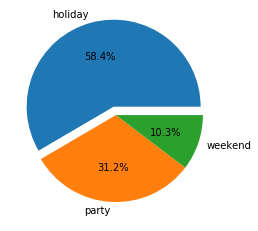

SITE_2


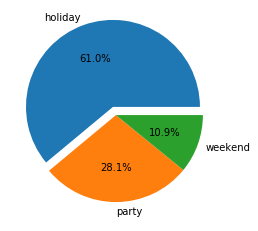

SITE_3


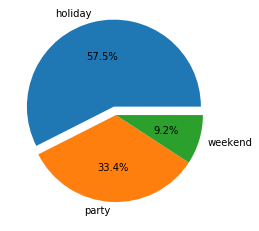

In [95]:
for site in for_graph['site'].unique():
    print(site)
    plt.pie(
        for_graph[for_graph['site'] == site]['uniq_users'],
        explode = (0.1, 0, 0),
        labels=for_graph[for_graph['site'] == site]['code_name'],
        autopct='%1.1f%%'
    )
    plt.show()

In [105]:
top_countries = data[data['code_name'] == 'holiday']\
    .groupby('country', as_index=False)\
    ['uniq_users'].count()\
    .sort_values('uniq_users', ascending=False)\
    .reset_index(drop=True)\
    .loc[:9, :]

In [106]:
top_countries

,country,uniq_users
0,Czech Republic (CZ),81
1,Moldova (MD),81
2,Kyrgyzstan (KG),72
3,Finland (FI),72
4,Uzbekistan (UZ),68
5,Netherlands (NL),68
6,Azerbaijan (AZ),66
7,Denmark (DK),59
8,Honduras (HN),57
9,India (IN),56


In [111]:
data.head()

,date_created,site,country,uniq_users,regs,conv,code_id,status,code_name
0,2019-08-01,SITE_2,Albania (AL),76,5,0.065789,22,C,holiday
1,2019-08-01,SITE_1,Algeria (DZ),213,66,0.309859,40,B,party
2,2019-08-01,SITE_3,Angola (AO),45,10,0.222222,15,C,weekend
3,2019-08-01,SITE_2,Argentina (AR),2191,103,0.047010,22,C,holiday
4,2019-08-01,SITE_3,Austria (AT),2467,512,0.207540,40,C,party


In [113]:
top_countr_conv = data[data['country'].isin(top_countries['country'])]\
    .groupby('country', as_index=False)\
    .agg({'uniq_users': 'sum', 'regs': 'sum'})

In [114]:
top_countr_conv['conv'] = 100*top_countr_conv['regs']/top_countr_conv['uniq_users']

In [116]:
top_countr_conv.sort_values('conv', ascending=False)

,country,uniq_users,regs,conv
9,Uzbekistan (UZ),127198,65835,51.757889
8,Netherlands (NL),122457,50461,41.207118
6,Kyrgyzstan (KG),102335,27074,26.456247
7,Moldova (MD),104538,22899,21.904953
5,India (IN),23954,3807,15.892962
0,Azerbaijan (AZ),102457,14999,14.639312
2,Denmark (DK),44861,1847,4.117162
3,Finland (FI),175549,5696,3.244678
1,Czech Republic (CZ),338459,7458,2.203517
4,Honduras (HN),46536,349,0.749957


### Task 2

In [119]:
data = pd.read_excel('Test MS Excel_MA.xlsx', sheet_name='task2', header=1, usecols=1)

In [121]:
data['Ref Code 2'] = data['Ref Code 1'].apply(lambda x: x.split('SOURCEREF_')[1])

In [125]:
table_2 = pd.read_clipboard()

In [131]:
table_2.rename(columns={'Таблица 2': 'pattern'}, inplace=True)

In [132]:
table_2

,pattern,Кол-во в таблице
0,paid1,NaN
1,paid2,NaN
2,paid3,NaN
3,paid4,NaN


In [127]:
table_3 = pd.read_clipboard()

In [133]:
table_3.rename(columns={'Таблица 3': 'pattern'}, inplace=True)

In [134]:
table_3

,pattern,Кол-во в таблице
0,wp,NaN
1,mb,NaN
2,rm,NaN
3,ns,NaN
4,dr,NaN


In [140]:
def find_patt(table):
    for index, row in table.iterrows():
        patt = row['pattern']
        table.loc[index, 'Кол-во в таблице'] = data[data['Ref Code 1'].str.contains(f"_{patt}_")].shape[0]
    return table

In [141]:
find_patt(table_2)

,pattern,Кол-во в таблице
0,paid1,0.0
1,paid2,7.0
2,paid3,14.0
3,paid4,7.0


In [142]:
find_patt(table_3)

,pattern,Кол-во в таблице
0,wp,10.0
1,mb,3.0
2,rm,12.0
3,ns,3.0
4,dr,0.0


### Task 3

In [556]:
data = pd.read_excel('Test MS Excel_MA.xlsx', sheet_name='task3', header=1, usecols=4)\
    .rename(
        columns={
            'Customer ID': 'id_user', 
            'Рекламный баннер ': 'banner', 
            'Дата регистрации': 'date_reg', 
            'Кол-во покупок': 'payments', 
            'Пол': 'gender'
        }
    )

/anaconda3/lib/python3.7/site-packages/pandas/io/excel/_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


In [557]:
data

,id_user,banner,date_reg,payments,gender
0,2,Banner 4,2018-10-29 00:01:41,3,ж
1,3,Banner 4,2018-10-29 00:01:42,0,ж
2,4,Banner 4,2018-10-29 00:02:13,1,ж
3,6,Banner 4,2018-10-29 00:03:12,9,ж
4,9,Banner 4,2018-10-29 00:12:30,1,ж
...,...,...,...,...,...
33956,112943,Banner 2,2018-12-02 23:26:36,1,м
33957,112944,Banner 2,2018-12-02 23:31:40,0,м
33958,112945,Banner 3,2018-12-02 23:34:40,1,м
33959,112946,Banner 3,2018-12-02 23:35:12,0,м


In [419]:
data.drop_duplicates().shape

(33961, 5)

In [420]:
by_banner = data.groupby(['banner'], as_index=False)\
    .agg({'id_user':'count', 'payments': 'sum'})\
    .rename(columns={'id_user': 'n_users'})

### Рассмотрим общуюю структуру данных

In [421]:
by_banner

,banner,n_users,payments
0,Banner 2,736,2212
1,Banner 3,730,3168
2,Banner 4,27887,57465
3,Banner 5,4608,4180


In [422]:
by_banner['pmt_per_user'] = by_banner['payments']/by_banner['n_users']

In [423]:
by_banner

,banner,n_users,payments,pmt_per_user
0,Banner 2,736,2212,3.005435
1,Banner 3,730,3168,4.339726
2,Banner 4,27887,57465,2.060638
3,Banner 5,4608,4180,0.907118


In [424]:
by_ban_gen = data.groupby(['banner', 'gender'], as_index=False)\
    .agg({'id_user':'count', 'payments': 'sum'})\
    .rename(columns={'id_user': 'n_users'})

In [425]:
by_ban_gen['pmt_per_user'] = by_ban_gen['payments']/by_ban_gen['n_users']

In [426]:
by_ban_gen

,banner,gender,n_users,payments,pmt_per_user
0,Banner 2,ж,413,1086,2.629540
1,Banner 2,м,323,1126,3.486068
2,Banner 3,ж,323,1368,4.235294
3,Banner 3,м,407,1800,4.422604
4,Banner 4,ж,12001,24056,2.004500
5,Banner 4,м,15886,33409,2.103047
6,Banner 5,ж,2163,2321,1.073047
7,Banner 5,м,2445,1859,0.760327


In [427]:
by_ban_gen = pd.merge(
    by_ban_gen,
    data[data['payments'] != 0].groupby(['banner', 'gender'], as_index=False)\
        .agg({'id_user':'count'})\
        .rename(columns={'id_user': 'uniq_payers'}),
    how='left',
    on=['banner', 'gender']
)

In [428]:
by_ban_gen['payers_to_regs'] = by_ban_gen['uniq_payers']/by_ban_gen['n_users']

In [429]:
by_ban_gen

,banner,gender,n_users,payments,pmt_per_user,uniq_payers,payers_to_regs
0,Banner 2,ж,413,1086,2.629540,168,0.406780
1,Banner 2,м,323,1126,3.486068,119,0.368421
2,Banner 3,ж,323,1368,4.235294,121,0.374613
3,Banner 3,м,407,1800,4.422604,172,0.422604
4,Banner 4,ж,12001,24056,2.004500,5298,0.441463
5,Banner 4,м,15886,33409,2.103047,6811,0.428742
6,Banner 5,ж,2163,2321,1.073047,751,0.347203
7,Banner 5,м,2445,1859,0.760327,625,0.255624


### Видим первый интересный момент: мужской трафик по 5му баннеру заметно менее платящий. Однако, если он и соизмеримо дешевле, то ничего необычного

In [430]:
sns.set(rc={'figure.figsize':(20, 8.27)})

### Посмотрим как распределены регистрации и оплаты во времени

In [431]:
by_ban_day = data.groupby(['banner', pd.Grouper(key='date_reg', freq='D')])\
    .agg({'id_user': 'count', 'payments': 'sum'})\
    .reset_index()

In [432]:
by_ban_day['p_to_reg'] = by_ban_day['payments']/by_ban_day['id_user']

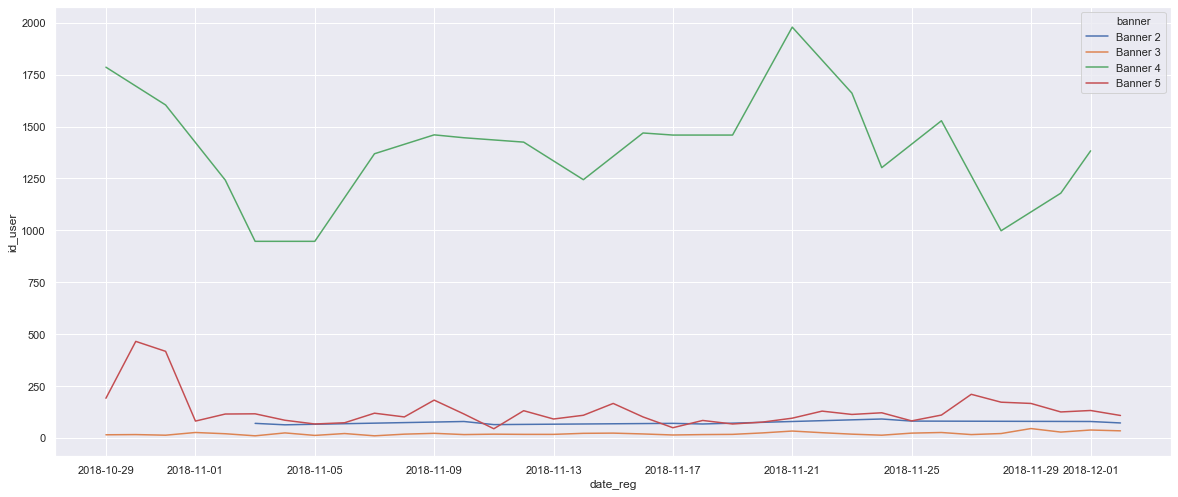

In [433]:
sns.lineplot(
    data=by_ban_day, 
    x='date_reg', y='id_user', hue='banner'
)

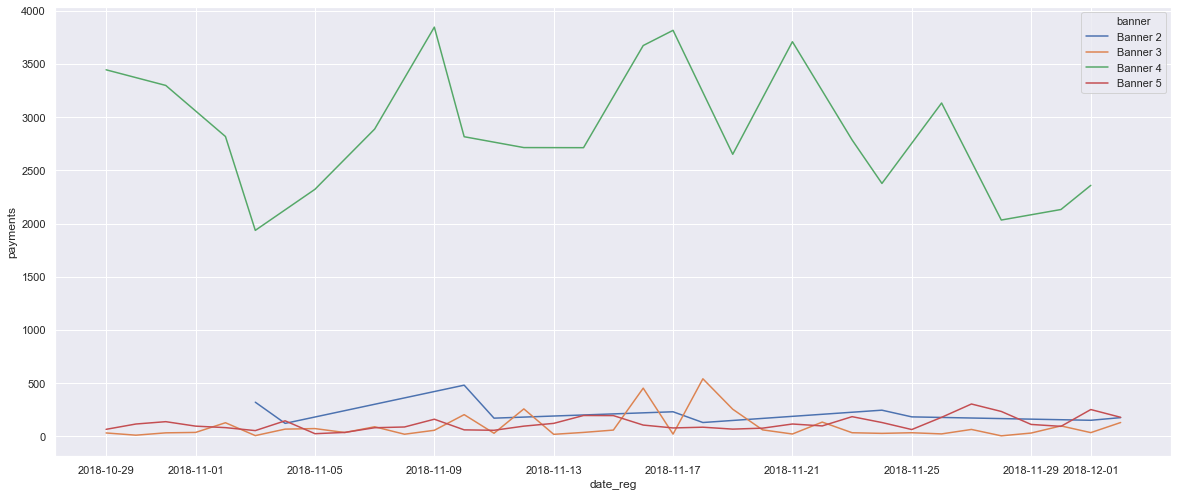

In [434]:
sns.lineplot(
    data=by_ban_day, 
    x='date_reg', y='payments', hue='banner'
)

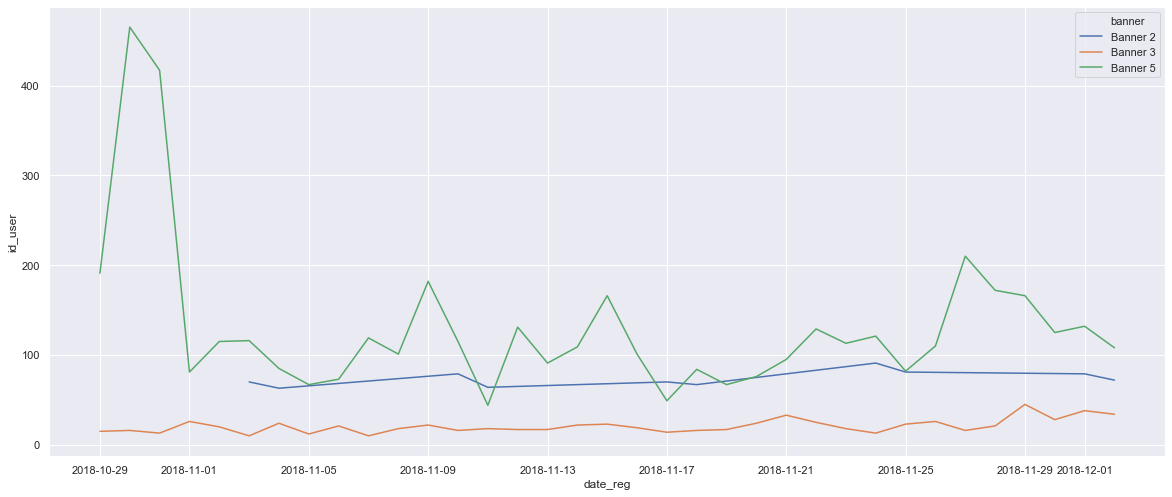

In [435]:
sns.lineplot(
    data=by_ban_day[by_ban_day['banner'] != 'Banner 4'], 
    x='date_reg', y='id_user', hue='banner'
)

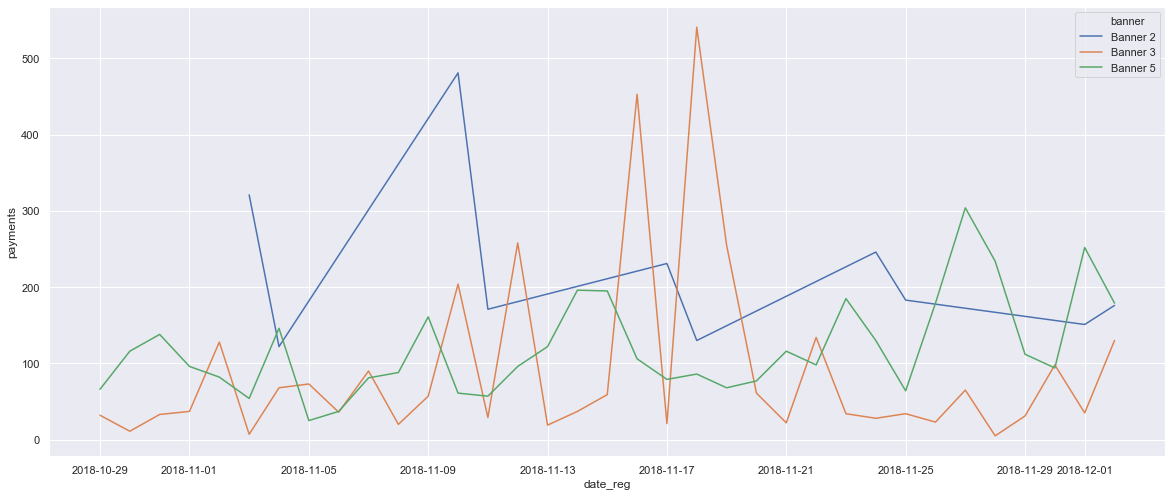

In [436]:
sns.lineplot(
    data=by_ban_day[by_ban_day['banner'] != 'Banner 4'], 
    x='date_reg', y='payments', hue='banner'
)

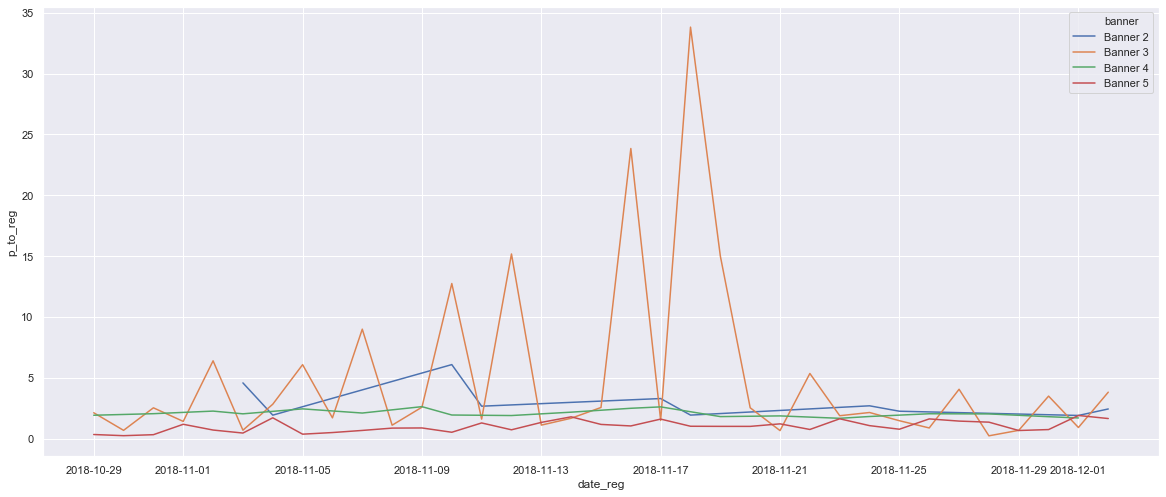

In [437]:
sns.lineplot(
    data=by_ban_day, 
    x='date_reg', y='p_to_reg', hue='banner'
)

### Крайне бесполезные графики, за исключением последнего. Видно, что по краям промежутка отсутствуют загибания, что может частично подтверждать то, что данные по когортам не обрезанные т.е. оплаты включены за фиксированное количество дней пользователя на продукте, например 30 дней. Рассматривать тенденции когорт по 2,3,5 баннеру с большей детализацией - лишено какого-либо смысла. Попробуем покрутить 4й баннер, где данных больше

In [438]:
banner_4 = data[data['banner'] == 'Banner 4'].groupby(['gender', pd.Grouper(key='date_reg', freq='D')])\
    .agg({'id_user': 'count', 'payments': 'sum'})\
    .reset_index()

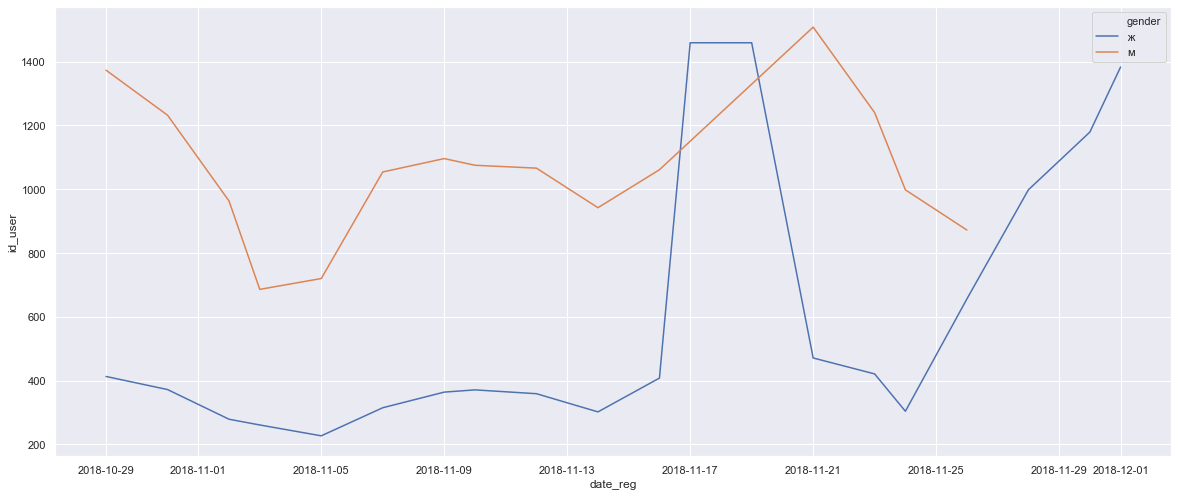

In [439]:
sns.lineplot(
    data=banner_4, 
    x='date_reg', y='id_user', hue='gender'
)

### Видно, что в данных есть пропуски посмотрим на них

In [440]:
import datetime as dt

In [441]:
data['date_reg'].min(), data['date_reg'].max()

(Timestamp('2018-10-29 00:01:41'), Timestamp('2018-12-02 23:55:27'))

In [442]:
date_test = pd.DataFrame(
    {'date': pd.date_range(start=data['date_reg'].min(), end=data['date_reg'].max(), freq='d')}
)

In [443]:
date_test['date'] = date_test['date'].dt.date

In [444]:
banner_4['date_reg'] = banner_4['date_reg'].dt.date

In [445]:
date_test = pd.merge(
    date_test, 
    banner_4[banner_4['gender'] == 'ж'],
    how='left',
    left_on='date',
    right_on='date_reg'
)

In [446]:
date_test

,date,gender,date_reg,id_user,payments
0,2018-10-29,ж,2018-10-29,413.0,1102.0
1,2018-10-30,NaN,NaN,NaN,NaN
2,2018-10-31,ж,2018-10-31,372.0,712.0
3,2018-11-01,NaN,NaN,NaN,NaN
4,2018-11-02,ж,2018-11-02,279.0,566.0
5,2018-11-03,ж,2018-11-03,261.0,484.0
6,2018-11-04,NaN,NaN,NaN,NaN
7,2018-11-05,ж,2018-11-05,227.0,297.0
8,2018-11-06,NaN,NaN,NaN,NaN
9,2018-11-07,ж,2018-11-07,315.0,564.0


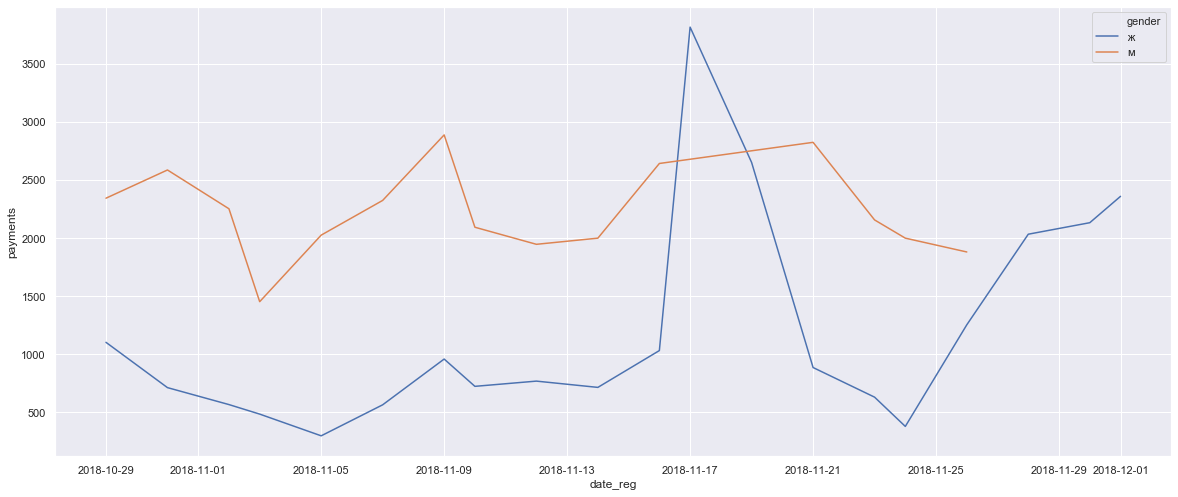

In [447]:
sns.lineplot(
    data=banner_4, 
    x='date_reg', y='payments', hue='gender'
)

### График оплат по когортам нам ничего нового не показывает

### Трафик по баннеру идет чуть ли не через день. Вопрос либо к качеству данных, либо к трафик-менеджеру, который через день отключает кампанию, возможно для оптимизации

### Расмотрим характер плательщиков по баннерам

In [448]:
data.head()

,id_user,banner,date_reg,payments,gender
0,2,Banner 4,2018-10-29 00:01:41,3,ж
1,3,Banner 4,2018-10-29 00:01:42,0,ж
2,4,Banner 4,2018-10-29 00:02:13,1,ж
3,6,Banner 4,2018-10-29 00:03:12,9,ж
4,9,Banner 4,2018-10-29 00:12:30,1,ж


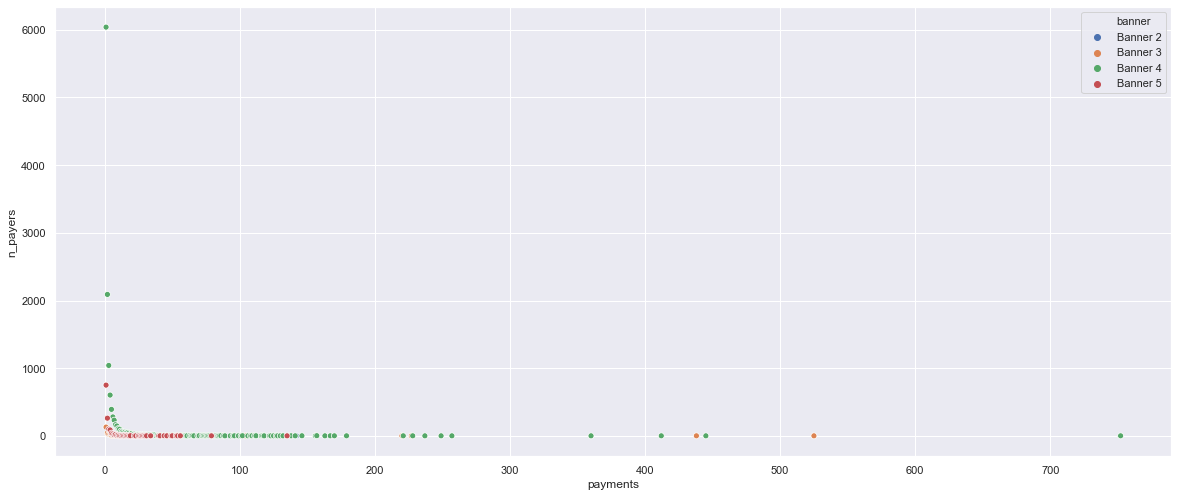

In [449]:
sns.scatterplot(
    data=data[data['payments'] >= 1]\
        .groupby(['banner', 'payments'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_payers'}),
    x='payments',
    y='n_payers',
    hue='banner'
)

#### По 4му и 3му баннеру залетело несколько хайролеров. Взглянем на них под "Лупой" 

In [559]:
import math as m

In [560]:
p_per_reg = pd.merge(
    data.groupby(['banner'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_regs'}),
    data[data['payments'] >= 1]\
        .groupby(['banner', 'payments'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_payers'}),
    how='right',
    on='banner'
)
p_per_reg['attitude'] = p_per_reg['n_payers']/p_per_reg['n_regs']
p_per_reg['attitude_log'] = p_per_reg['attitude'].apply(m.log)
p_per_reg['log_payments'] = p_per_reg['payments'].apply(m.log)
p_per_reg['log_n_payers'] = p_per_reg['n_payers'].apply(m.log)

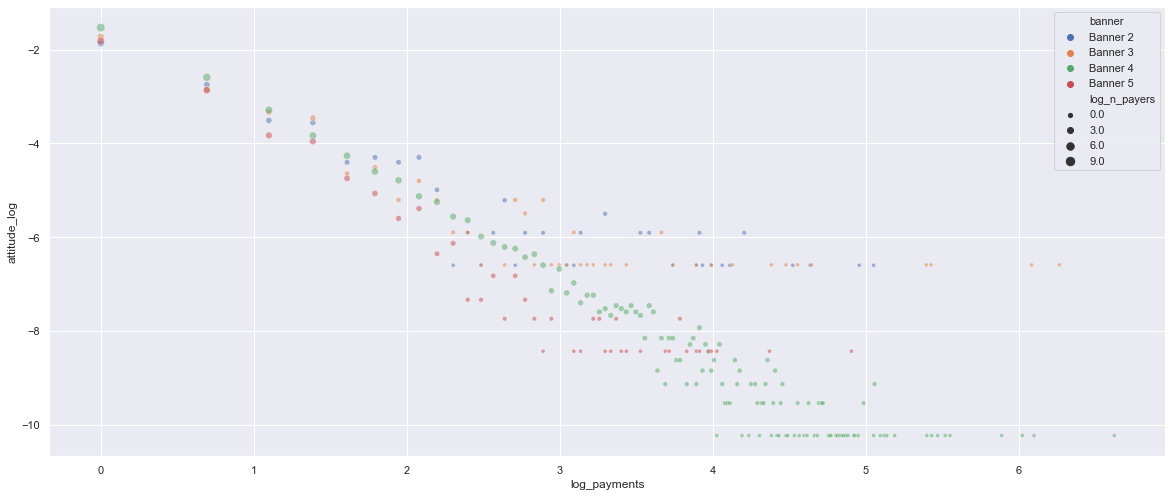

In [453]:
sns.scatterplot(
    data=p_per_reg,
    y='attitude_log',
    x='log_payments',
    size='log_n_payers',
    hue='banner',
    alpha=0.5
)

### По х - логарифм количества оплат, по у - логарифм от доли платников с N оплат к количеству регистраций. Очень хорошо видно скопление много-платящих пользователей по 4му и 3му баннеру. Об остальных баннерах мало, что интересного нам дал график выше. Взглянем на распределения платников по группам.

In [568]:
p_per_reg_g = pd.merge(
    data.groupby(['banner', 'gender'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_regs'}),
    data[data['payments'] >= 1]\
        .groupby(['banner', 'payments', 'gender'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_payers'}),
    how='right',
    on=['banner', 'gender']
)
p_per_reg_g['attitude'] = p_per_reg_g['n_payers']/p_per_reg_g['n_regs']
p_per_reg_g['attitude_log'] = p_per_reg_g['attitude'].apply(m.log)
p_per_reg_g['log_payments'] = p_per_reg_g['payments'].apply(m.log)
p_per_reg_g['log_n_payers'] = p_per_reg_g['n_payers'].apply(m.log)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


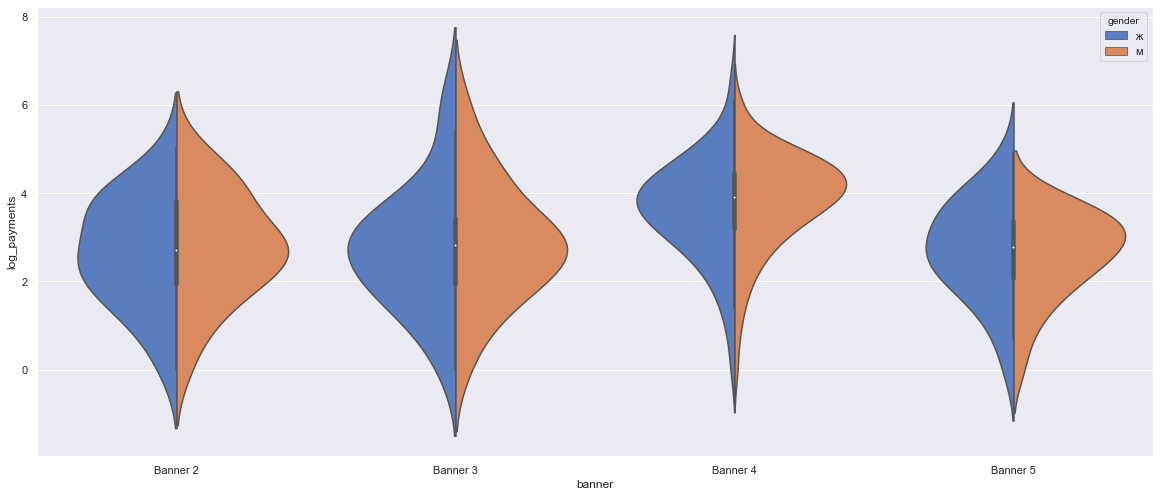

In [570]:
sns.violinplot(
    data=p_per_reg_g,
    x='banner',
    y='log_payments',
    hue='gender',
    palette="muted", 
    split=True
)

### Хорошо видно "скос" по количеству платников c 50+ оплат у 4го баннера и верхний "длинный, толстый хвост" у 3го баннера. Я бы сказал, что трафик по этим двум баннерам наиболее платящий. По 2му и 5му баннерах вовсе отсутствует верхний хвост сравнительно с 3,4 баннерами, большая часть платников соредоточена на промежутке < 50 оплат. Разбивка по полу особо никакой новой информации нам не дает.

In [471]:
data[data['payments'] >= 200]

,id_user,banner,date_reg,payments,gender
1080,2424,Banner 4,2018-10-29 13:59:04,412,ж
2605,8688,Banner 4,2018-10-31 04:17:39,360,м
7468,25480,Banner 4,2018-11-05 07:06:57,257,м
7589,25908,Banner 4,2018-11-05 09:21:09,237,м
8900,32883,Banner 4,2018-11-07 10:30:54,228,м
11639,43161,Banner 4,2018-11-09 21:50:05,221,ж
14817,50507,Banner 3,2018-11-12 19:00:44,220,м
17876,65142,Banner 4,2018-11-16 17:01:06,445,м
18189,66124,Banner 3,2018-11-16 20:57:32,438,м
18483,66733,Banner 4,2018-11-17 05:59:34,249,ж


### Рассмотрим такуе метрику как конверсия в N-ю оплату 

In [265]:
conv_rate = pd.merge(
    data.groupby(['banner', 'gender'], as_index=False).agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_regs'}),
    data[data['payments'] >= 10].groupby(['banner', 'gender'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'n_payers'}),
    how='left',
    on=['banner', 'gender']
)

### Рассмотрим процент N-оплат закрытых следующей оплатой до 100й оплаты

In [ ]:
def roll_by_ban(df, banner):
    new_df = df[df['banner'] == banner].sort_values('pay')
    new_df['conv_pow_rollmean'] = new_df['conv_pow'].rolling(3).mean()
    new_df['conv_pow_rollmean'] = new_df[['conv_pow_rollmean', 'conv_pow']]\
        .apply(
            lambda x: x['conv_pow'] if np.isnan(x['conv_pow_rollmean']) else x['conv_pow_rollmean'],
            axis=1
        )
    return new_df

In [294]:
n_pay_conv = pd.DataFrame()
for pay in range(1, 100):
    conv_rate = pd.merge(
        data[data['payments'] >= pay]\
            .groupby('banner', as_index=False).agg({'id_user': 'count'})\
            .rename(columns={'id_user': 'lower_pmnt_users'}),
        data[data['payments'] > pay].groupby('banner', as_index=False)\
            .agg({'id_user': 'count'})\
            .rename(columns={'id_user': 'n_payers'}),
        how='left',
        on='banner'
    )
    conv_rate = conv_rate[conv_rate['n_payers'] > 2]
    conv_rate['conv'] = conv_rate['n_payers']/conv_rate['lower_pmnt_users']
    conv_rate['pay'] = pay
    conv_rate['pay_log'] = conv_rate['pay'].apply(m.log)
    conv_rate['conv_pow'] = conv_rate['conv'].apply(lambda x: pow(x, 9))
    n_pay_conv = n_pay_conv.append(conv_rate)
    
final_df = pd.DataFrame()
for banner in data['banner'].unique(): 
    new_df = n_pay_conv[n_pay_conv['banner'] == banner].sort_values('pay')
    new_df['conv_pow_rollmean'] = new_df['conv_pow'].rolling(5).mean()
    new_df['conv_pow_rollmean'] = new_df[['conv_pow_rollmean', 'conv_pow']]\
        .apply(
            lambda x: x['conv_pow'] if np.isnan(x['conv_pow_rollmean']) else x['conv_pow_rollmean'],
            axis=1
        )
    final_df = final_df.append(new_df)

### Тут я начал исполнять, поскольку не помню как применить элегантно оконную функцию в пандасе со скользящим, а тестовое делаю в поезде без интернета :( по-этому скостылял с циклами и дополнительным датафреймом

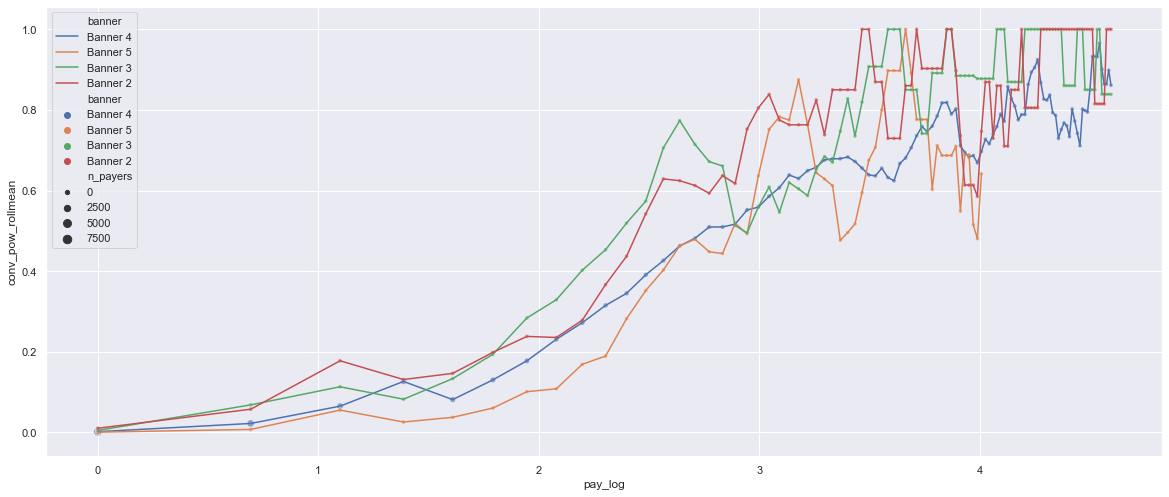

In [295]:
sns.scatterplot(data=final_df, x='pay_log', y='conv_pow_rollmean', hue='banner', alpha=0.6, size='n_payers')
sns.lineplot(data=final_df, x='pay_log', y='conv_pow_rollmean', hue='banner')

### Возведение "у" к 9й степени и "х" к логарифму позволяет немного "выровнять" график, чтоб на него в принципе было реально смотреть. Баннер № 5 как всегда пасет задних, кривые 3,2го банера идут выше кривой 4го, что говорит неплохом потенциале этих баннеров, который не раскрыт из-за малого количества трафика и туда могли не успеть залететь хайролеры. 

### Итого: слабее всего себя проявляет 5й баннер по всем показателям, поскольку мы не знаем цену за регистрацию трудно сказать что-то о его целесообразности. Баннер 2 привлекает трафик более стабильный, однако пока было достаточно мало хайролеров. Я бы еще поналивал, чтоб быть более уверенным в "плохом" качестве баннера. Чего не скажешь о 3м и 4м баннере. Ситуация достаточно интересная, с одной стороны у нас больше, чем у остальных хайролеров в трафике, с другой стороны большая доля платников с относительно низким количеством оплат, что создает сложности, но если научиться с трафиком правильно работать и не терять ценных хайролеров - может очень хорошо перформить.

### Task4

In [571]:
data = pd.read_excel('Test MS Excel_MA.xlsx', sheet_name='task4', header=1, usecols=6)\
    .rename(
        columns={
            'Site': 'site',
            'Customer ID': 'id_user', 
            'Month (Registration)': 'month_reg',
            'Month (pay)': 'month_pay',
            'Campaign Name': 'camp_name', 
            'Count': 'n_payments', 
            'Total sum UAH': 'amount'
        }
    )

/anaconda3/lib/python3.7/site-packages/pandas/io/excel/_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


In [473]:
data

,site,id_user,month_reg,month_pay,camp_name,n_payments,amount
0,Site_1,1,2019-03-01,2019-03-01,Campaign_2,1,87.61
1,Site_1,2,2019-07-01,2019-07-01,Campaign_2,3,987.24
2,Site_1,2,2019-07-01,2019-08-01,Campaign_2,6,2012.56
3,Site_1,3,2019-02-01,2019-02-01,Campaign_2,1,68.55
4,Site_1,4,2019-10-01,2019-10-01,Campaign_2,2,122.72
...,...,...,...,...,...,...,...
40452,Site_1,40213,2019-10-01,2019-10-01,Campaign_1,1,148.34
40453,Site_1,40214,2019-10-01,2019-10-01,Campaign_3,2,1153.73
40454,Site_1,40215,2019-10-01,2019-10-01,Campaign_1,2,247.32
40455,Site_1,40216,2019-10-01,2019-10-01,Campaign_1,1,164.82


In [474]:
data.drop_duplicates().shape

(40457, 7)

In [475]:
data[['site', 'camp_name']].drop_duplicates()

,site,camp_name
0,Site_1,Campaign_2
304,Site_1,Campaign_4
311,Site_1,Campaign_7
1115,Site_1,Campaign_6
2538,Site_1,Campaign_3
4095,Site_1,Campaign_5
7862,Site_1,Campaign_1


### Колонка site - бесполезная

In [476]:
data.drop('site', axis=1, inplace=True)

In [477]:
data['month_reg'] = data['month_reg'].apply(pd.to_datetime)
data['month_pay'] = data['month_pay'].apply(pd.to_datetime)

In [478]:
data[data['n_payments'] == 0]

,id_user,month_reg,month_pay,camp_name,n_payments,amount


In [479]:
smmry = data.groupby('camp_name', as_index=False)\
    .agg({'id_user': 'count', 'n_payments': 'sum', 'amount': 'sum'})\
    .rename(columns={'id_user': 'n_users'})
smmry['mean_pays'] = smmry['n_payments']/smmry['n_users']
smmry['mean_check'] = smmry['amount']/smmry['n_payments']
smmry['mean_amount'] = smmry['amount']/smmry['n_users']

In [480]:
smmry

,camp_name,n_users,n_payments,amount,mean_pays,mean_check,mean_amount
0,Campaign_1,10537,36684,13572479.77,3.481446,369.983638,1288.078179
1,Campaign_2,7400,28502,8940193.73,3.851622,313.668996,1208.134288
2,Campaign_3,6820,20267,6487627.31,2.971701,320.107925,951.265001
3,Campaign_4,6814,21337,5426993.22,3.131347,254.346591,796.447493
4,Campaign_5,3247,10788,2864743.86,3.322451,265.549116,882.274056
5,Campaign_6,3189,11447,4362142.66,3.589526,381.073003,1367.871640
6,Campaign_7,2450,9775,3278052.53,3.989796,335.350642,1337.980624



### Первыми, как аутсайдеры, на глаз падают кампании 3, 4, 5 

### Рассмотрим когрты по кампаниям

In [481]:
data.head()

,id_user,month_reg,month_pay,camp_name,n_payments,amount
0,1,2019-03-01,2019-03-01,Campaign_2,1,87.61
1,2,2019-07-01,2019-07-01,Campaign_2,3,987.24
2,2,2019-07-01,2019-08-01,Campaign_2,6,2012.56
3,3,2019-02-01,2019-02-01,Campaign_2,1,68.55
4,4,2019-10-01,2019-10-01,Campaign_2,2,122.72


In [512]:
by_cohorts = data.groupby(['camp_name', 'month_reg'], as_index=False)\
    .agg({'id_user': 'nunique', 'amount':'sum', 'n_payments': 'sum'})\
    .rename(columns={'id_user': 'n_users'})

In [513]:
by_cohorts['amount_by_user'] = by_cohorts['amount']/by_cohorts['n_users']
by_cohorts['payments_by_user'] = by_cohorts['n_payments']/by_cohorts['n_users']

In [484]:
by_cohorts['month_reg'] = by_cohorts['month_reg'].apply(pd.to_datetime)

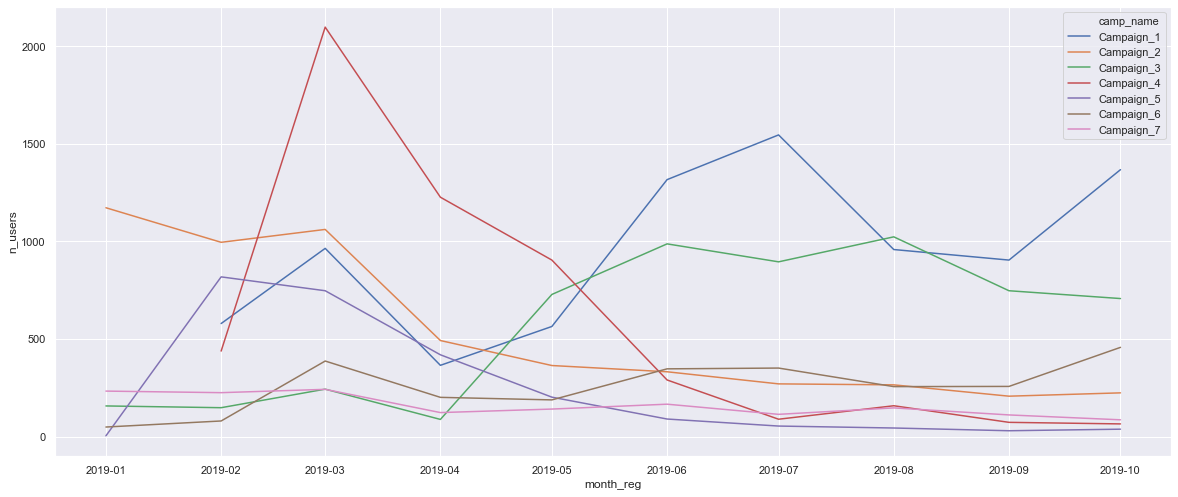

In [485]:
sns.lineplot(data=by_cohorts, x='month_reg', y='n_users', hue='camp_name')

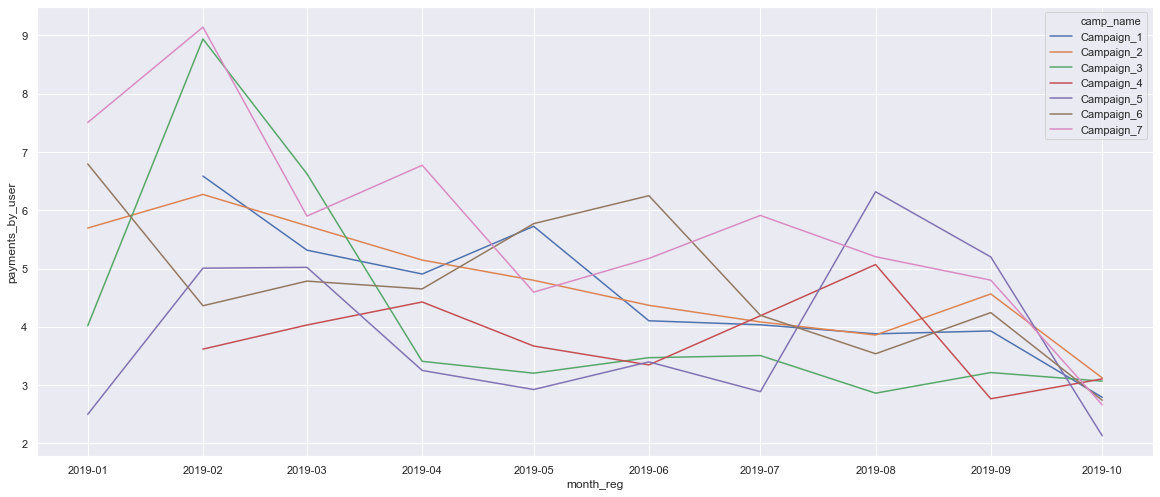

In [514]:
sns.lineplot(data=by_cohorts, x='month_reg', y='payments_by_user', hue='camp_name')

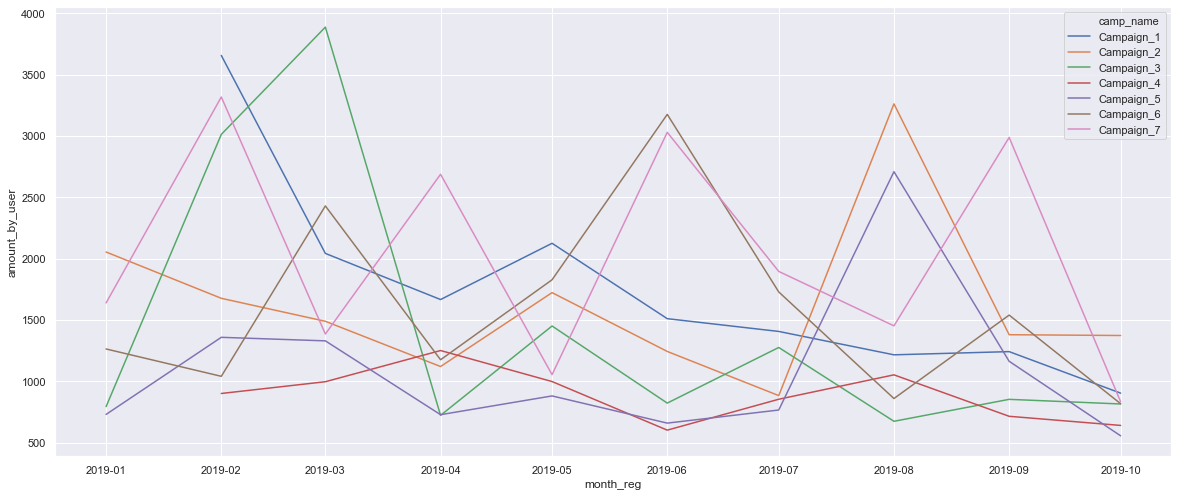

In [486]:
sns.lineplot(data=by_cohorts, x='month_reg', y='amount_by_user', hue='camp_name')

### В целом ничего новго. Присутствует значительная волатильность в деньгах по пользователю, похже дело снова в хайроллерах. Также кампании 3, 4, 5 снова "внизу". Поскольку платежные данные по последней когорте есть только за 1 месяц - рассмотрим оплаты за первый месяц по когортам.

In [509]:
data.head()

,id_user,month_reg,month_pay,camp_name,n_payments,amount
0,1,2019-03-01,2019-03-01,Campaign_2,1,87.61
1,2,2019-07-01,2019-07-01,Campaign_2,3,987.24
2,2,2019-07-01,2019-08-01,Campaign_2,6,2012.56
3,3,2019-02-01,2019-02-01,Campaign_2,1,68.55
4,4,2019-10-01,2019-10-01,Campaign_2,2,122.72


In [510]:
first_month = data[data['month_reg'] == data['month_pay']]\
    .groupby(['camp_name', 'month_reg'], as_index=False)\
    .agg({'id_user': 'nunique', 'amount':'sum', 'n_payments': 'sum'})\
    .rename(columns={'id_user': 'n_users'})
first_month['amount_by_user'] = first_month['amount']/first_month['n_users']
first_month['payments_by_user'] = first_month['n_payments']/first_month['n_users']

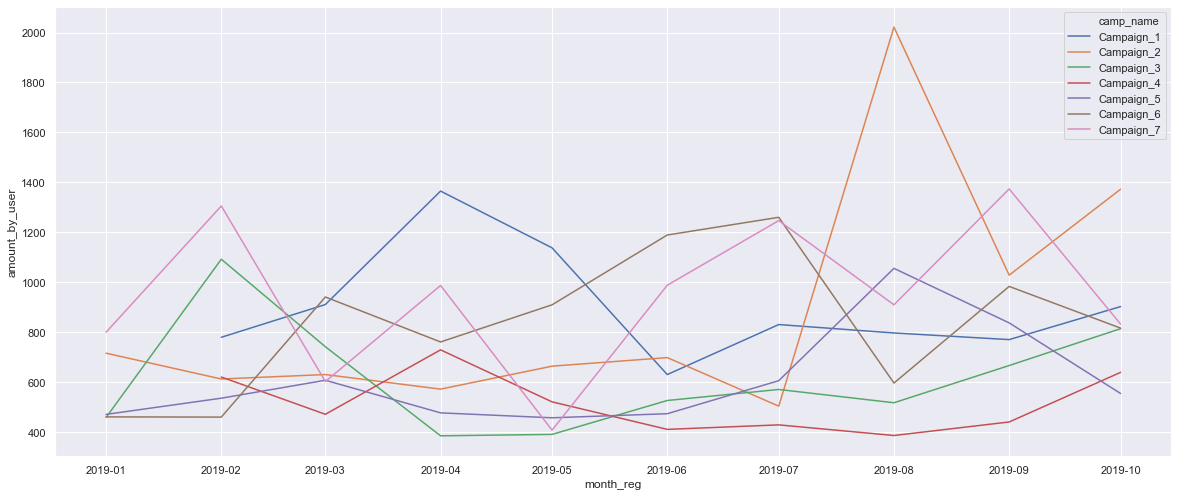

In [488]:
sns.lineplot(data=first_month, x='month_reg', y='amount_by_user', hue='camp_name')

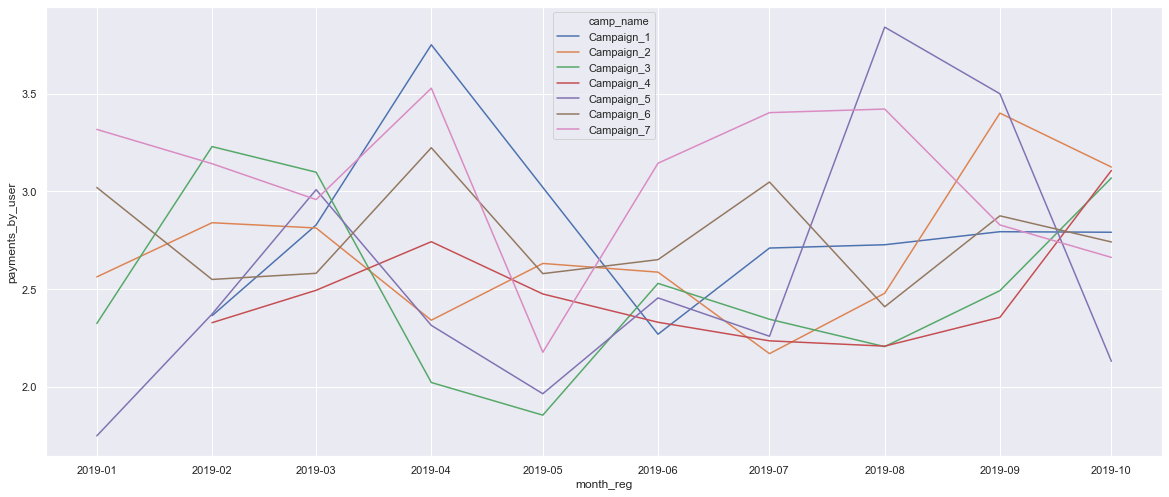

In [511]:
sns.lineplot(data=first_month, x='month_reg', y='payments_by_user', hue='camp_name')

### Видим положительную динамику за последние 2 месяца 3,4 кампаний, кампания №5 и тут прявляется не лучшим образом. Под вопросом теперь и 7я кампания. Взглянем на последние 2 месяца поближе. 

In [533]:
payments = pd.merge(
    data[data['month_reg'] >= '2019-09-01'].groupby(['id_user', 'camp_name'], as_index=False)\
        .agg({'n_payments': 'sum'})
        .groupby(['camp_name', 'n_payments'], as_index=False)\
        .agg({'id_user': 'count'})\
        .rename(columns={'id_user': 'payers'}),
    data.groupby('camp_name', as_index=False).agg({'id_user': 'nunique'})\
        .rename(columns={'id_user': 'n_users'}),
    how='left',
    on='camp_name'
)
payments['dolya'] = payments['payers']/payments['n_users'] 
payments['dolya_log'] = payments['dolya'].apply(m.log)
payments['n_pays_log'] = payments['n_payments'].apply(m.log)

In [534]:
to_off = ['Campaign_3', 'Campaign_4', 'Campaign_5', 'Campaign_7']

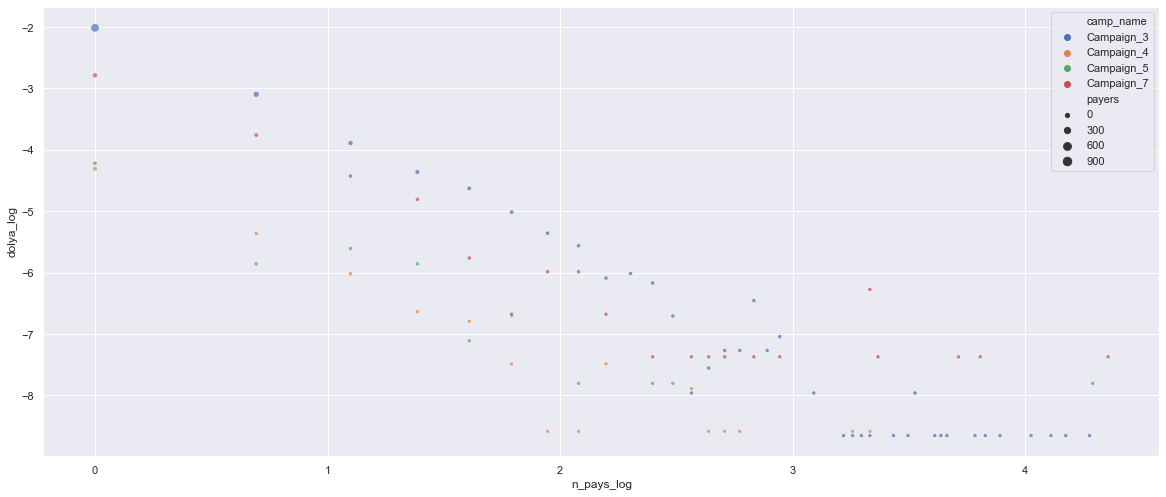

In [535]:
sns.scatterplot(
    data=payments[payments['camp_name'].isin(to_off)], 
    x='n_pays_log', y='dolya_log', size='payers', alpha=0.7, hue='camp_name'
)

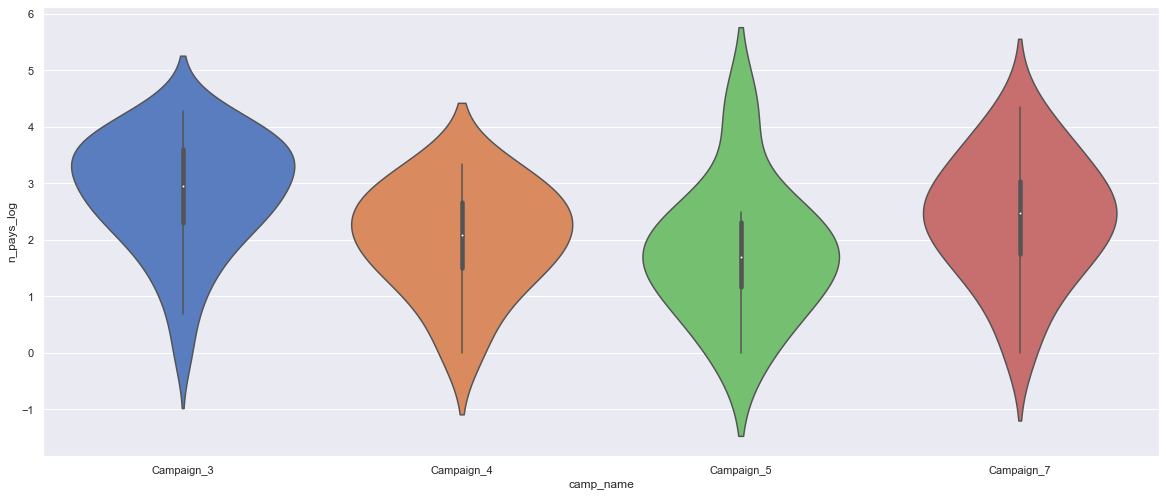

In [536]:
sns.violinplot(
    data=payments[payments['camp_name'].isin(to_off)],
    x='camp_name',
    y='n_pays_log',
    palette="muted"
)

### На данном графике хорошо видно "провал" 4й и 5й кампании. С учетом всего рассмотренного выше - я бы рекомендовал отключать именно их. Также хотелось добавить, что во всех расчетах я позволял себе рабоать с "недожившими" когортами, поскольку задача заключается в сравненении, а не в точных расчетах.

### Task 5

In [583]:
a_spend = 1000
a_regs = 500
a_payments = 50
a_m_check = 15

In [587]:
b_spend = 1500
b_regs = 700
b_payments = 40
b_m_check = 30

In [588]:
a_total_rev = a_payments*a_m_check
a_roi = 100*(a_total_rev - a_spend)/a_spend

In [594]:
b_total_rev = b_payments*b_m_check
b_roi = 100*(b_total_rev - b_spend)/b_spend

In [596]:
a_total_rev, b_total_rev

(750, 1200)

In [595]:
a_roi, b_roi

(-25.0, -20.0)

### Вопрос на самом деле достаточно философский. С одной стороны, в лоб посчитать рои + бОльшие объемы - очевидный фаворит кампания Б. Но если взглянуть на средний чек и количество платежей к количеству регистраций и учесть, что в стандартной воронке первые платежи меньше, чем последующие - конверсия в кампании А гораздо выше. В случае реальной задачи я бы склонился к некому "прогнозному" ROI и уже на его основании бы принимал решение. 